In [38]:
import cv2
import numpy as np
import math
import pandas as pd
import copy

In [39]:
def checkColor(list1,list2):
    sub_list = []
    zip_object = zip(list1, list2)
    for list1_i, list2_i in zip_object:
        sub_list.append(abs(list1_i - list2_i))
    for ele in sub_list:
        if ele < 15:
            flag=True
        else:
            return False
    if flag:
        return True

In [40]:
def mouse_click(event, x, y, 
                flags, param):
    ## Function for selecting background color 
    if event == cv2.EVENT_LBUTTONDOWN:
        bg_coords=img[y,x]
        fun(bg_coords)
img=None


In [41]:
def main(i):
    global img
    i=str(i)
    img = cv2.imread(i+".png")
    imgGray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow("img1".img)
    #cv2.setMouseCallback('img', mouse_click)

In [42]:
def fun(bg_coords):
    
    global img
    #img2 = np.zeros((610,808,3), np.uint8)
    img2=img
    #Selecting image
    #this variable is for background co ordinates
    bgcolor=np.array(bg_coords)
    bgcolorformask2=np.array([35,35,36])
    mask = cv2.inRange(img, bgcolor, bgcolor)
    mask2 = cv2.inRange(img, bgcolorformask2, bgcolorformask2)
    #print(bgcolor)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours2, hierarchy2 = cv2.findContours(mask2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours2=sorted(contours2,key=lambda x:cv2.contourArea(x),reverse=True)
    for cnt in contours2:    
        areaOfPlayGnd = cv2.contourArea(cnt)
        if areaOfPlayGnd < 10:
            continue
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.05 * peri, True)
        verticesOfGnd=approx
        #print(approx)
        cv2.drawContours(img,[approx],0,(0,255,0),3)
        break
    #print(len(contours))
    i=10
    j=255
    k=150
    li=[]
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 10:
            continue
        #i=i+3
        #j=j-3
        #k=k+3
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.05 * peri, True)
        li.append(approx)
        cv2.drawContours(img,[approx],0,(j,i,k),1)
    print("Unoccupied Cells :",len(li))
    #cv2.imshow("img2",img)
    li=[]
    li.append(list(verticesOfGnd[0][0]))
    li.append(list(verticesOfGnd[1][0]))
    li.append(list(verticesOfGnd[2][0]))
    li.append(list(verticesOfGnd[3][0]))
    verticesOfGnd=li
    #print(verticesOfGnd)
    width=math.sqrt(abs(
        (verticesOfGnd[0][0]-verticesOfGnd[3][0])*(verticesOfGnd[0][0]-verticesOfGnd[3][0])
        +(verticesOfGnd[0][1]-verticesOfGnd[3][1])*(verticesOfGnd[0][1]-verticesOfGnd[3][1])
        ))
    #print(width)
    length=math.sqrt(abs(
        (verticesOfGnd[0][0]-verticesOfGnd[1][0])*(verticesOfGnd[0][0]-verticesOfGnd[1][0])
        +(verticesOfGnd[0][1]-verticesOfGnd[1][1])*(verticesOfGnd[0][1]-verticesOfGnd[1][1])
        ))
    #print(length)
    blklength=int(length/10)
    blkwidth=int(width/10)
    
    halfblklength=int((length/10)/2)
    halfblkwidth=int((width/10)/2)
    matrixOfBlocks=[]
    y=verticesOfGnd[0][1]+int(halfblklength/2)+5
    x=verticesOfGnd[0][0]+halfblkwidth
    ycopy=verticesOfGnd[0][1]+halfblklength
    xcopy=verticesOfGnd[0][0]+halfblkwidth
    try:
        for i in range(0,20):
            matrixOfBlocks.append([])
            for j in range(0,10):
                if j == 0:
                    x=xcopy
                
                matrixOfBlocks[i].append(list(img[y,x]))
                img2 = cv2.circle(img2, (x,y), 0, (30,60,200), 3)
                x=x+blkwidth   
            y=y+halfblklength
        #print(matrixOfBlocks)
    except Exception as e:
        print (e)
    finally:
        #pass
        cv2.imshow("img2",img2)
    blockColors(matrixOfBlocks)

In [43]:
def blockColors(matrixOfBlocks):
    global img
    blockClrs={
        "iblock":[208, 185, 0],
        "sqblock":[0, 200, 218],
        "Jblock":[218, 117, 0],
        "Lblock":[0,148,208],
        "Zblock":[0, 0, 218],
        "Sblock":[60, 218, 0],
        "Tblock":[218, 0, 182]
        }
    noOfBlocks={
        "iblock":0,
        "sqblock":0,
        "Lblock":0,
        "Jblock":0,
        "Zblock":0,
        "Sblock":0,
        "Tblock":0
        }
    noOfTetrominoes={
        "iblock":0,
        "sqblock":0,
        "Lblock":0,
        "Jblock":0,
        "Zblock":0,
        "Sblock":0,
        "Tblock":0
        }
    pd.set_option('display.max_columns', None)
    df = pd.DataFrame(data=matrixOfBlocks)
    print(df)
    matrixOfBlocks2=copy.deepcopy(matrixOfBlocks)
    for ele in matrixOfBlocks2:
        ele.insert(0,[0, 0, 0])
        ele.insert(0,[0, 0, 0])
        ele.append([0, 0, 0])
        ele.append([0, 0, 0])
    matrixOfBlocks2.insert(0,[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0]])
    matrixOfBlocks2.insert(0,[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0]])
    matrixOfBlocks2.append([[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0]])
    matrixOfBlocks2.append([[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0]])
    df = pd.DataFrame(data=matrixOfBlocks2)
    #print(df)
    matrixOfBlocks=matrixOfBlocks2
    #print(matrixOfBlocks)
    for i in matrixOfBlocks:
        for j in i:
            #if list(j)==list(blockClrs["iblock"]):
            if checkColor(list(j),list(blockClrs["iblock"])):
                noOfBlocks["iblock"]=noOfBlocks["iblock"]+1
            elif checkColor(list(j),list(blockClrs["sqblock"])):
                noOfBlocks["sqblock"]=noOfBlocks["sqblock"]+1
            elif checkColor(list(j),list(blockClrs["Lblock"])):
                noOfBlocks["Lblock"]=noOfBlocks["Lblock"]+1
            elif checkColor(list(j),list(blockClrs["Jblock"])):
                noOfBlocks["Jblock"]=noOfBlocks["Jblock"]+1
            elif checkColor(list(j),list(blockClrs["Sblock"])):
                noOfBlocks["Sblock"]=noOfBlocks["Sblock"]+1
            elif checkColor(list(j),list(blockClrs["Zblock"])):
                noOfBlocks["Zblock"]=noOfBlocks["Zblock"]+1
            elif checkColor(list(j),list(blockClrs["Tblock"])):
                noOfBlocks["Tblock"]=noOfBlocks["Tblock"]+1
    print("Number of Cells for each Tetrominoes",noOfBlocks)
    for i in range(0,24):
        for j in range(0,14):
            try:
                ##I block##
                #print(list(matrixOfBlocks[i][j]),list(blockClrs["iblock"]))
                if checkColor(list(matrixOfBlocks[i][j]),list(blockClrs["iblock"])):
                    if checkColor(list(matrixOfBlocks[i][j+1]),list(blockClrs["iblock"])):
                        if checkColor(list(matrixOfBlocks[i][j+2]),list(blockClrs["iblock"])):
                            if checkColor(list(matrixOfBlocks[i][j+3]),list(blockClrs["iblock"])):
                                noOfTetrominoes["iblock"]=noOfTetrominoes["iblock"]+1
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["iblock"])):
                        if checkColor(list(matrixOfBlocks[i+2][j]),list(blockClrs["iblock"])):
                            if checkColor(list(matrixOfBlocks[i+3][j]),list(blockClrs["iblock"])):
                                noOfTetrominoes["iblock"]=noOfTetrominoes["iblock"]+1
                ##Square block##
                elif list(matrixOfBlocks[i][j])==list(blockClrs["sqblock"]):
                    if list(matrixOfBlocks[i][j+1])==list(blockClrs["sqblock"]):
                        if list(matrixOfBlocks[i+1][j+1])==list(blockClrs["sqblock"]):
                            if list(matrixOfBlocks[i][j+1])==list(blockClrs["sqblock"]):
                                noOfTetrominoes["sqblock"]=noOfTetrominoes["sqblock"]+1
                ##J block##
                elif checkColor(list(matrixOfBlocks[i][j]),list(blockClrs["Jblock"])):
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Jblock"])):
                        if checkColor(list(matrixOfBlocks[i+1][j+1]),list(blockClrs["Jblock"])):
                            if checkColor(list(matrixOfBlocks[i+1][j+2]),list(blockClrs["Jblock"])):
                                noOfTetrominoes["Jblock"]=noOfTetrominoes["Jblock"]+1
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Jblock"])):
                        if checkColor(list(matrixOfBlocks[i+2][j]),list(blockClrs["Jblock"])):
                            if checkColor(list(matrixOfBlocks[i][j+1]),list(blockClrs["Jblock"])):
                                noOfTetrominoes["Jblock"]=noOfTetrominoes["Jblock"]+1
                    if checkColor(list(matrixOfBlocks[i][j+1]),list(blockClrs["Jblock"])):
                        if checkColor(list(matrixOfBlocks[i][j+2]),list(blockClrs["Jblock"])):
                            if checkColor(list(matrixOfBlocks[i+1][j+2]),list(blockClrs["Jblock"])):
                                noOfTetrominoes["Jblock"]=noOfTetrominoes["Jblock"]+1
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Jblock"])):
                        if checkColor(list(matrixOfBlocks[i+2][j]),list(blockClrs["Jblock"])):
                            if checkColor(list(matrixOfBlocks[i+2][j-1]),list(blockClrs["Jblock"])):
                                noOfTetrominoes["Jblock"]=noOfTetrominoes["Jblock"]+1
                ##L block##
                elif checkColor(list(matrixOfBlocks[i][j]),list(blockClrs["Lblock"])):
                    #print(list(matrixOfBlocks[i][j+1]),list(blockClrs["Lblock"]))
                    #print("0 true")
                    #print(i,j)
                    #print(list(matrixOfBlocks[i][j+1])==list(blockClrs["Lblock"]))
                    if checkColor(list(matrixOfBlocks[i][j+1]),list(blockClrs["Lblock"])):
                        if checkColor(list(matrixOfBlocks[i][j+2]),list(blockClrs["Lblock"])):
                            if checkColor(list(matrixOfBlocks[i-1][j+2]),list(blockClrs["Lblock"])):
                                noOfTetrominoes["Lblock"]=noOfTetrominoes["Lblock"]+1
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Lblock"])):
                        if checkColor(list(matrixOfBlocks[i+2][j]),list(blockClrs["Lblock"])):
                            if checkColor(list(matrixOfBlocks[i+2][j+1]),list(blockClrs["Lblock"])):
                                noOfTetrominoes["Lblock"]=noOfTetrominoes["Lblock"]+1
                    if checkColor(list(matrixOfBlocks[i][j+1]),list(blockClrs["Lblock"])):
                        if checkColor(list(matrixOfBlocks[i][j+2]),list(blockClrs["Lblock"])):
                            if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Lblock"])):
                                noOfTetrominoes["Lblock"]=noOfTetrominoes["Lblock"]+1
                    if checkColor(list(matrixOfBlocks[i][j+1]),list(blockClrs["Lblock"])):
                        #print("1 true")
                        if checkColor(list(matrixOfBlocks[i+1][j+1]),list(blockClrs["Lblock"])):
                        #    print("2 true")
                            if checkColor(list(matrixOfBlocks[i+2][j+1]),list(blockClrs["Lblock"])):
                        #        print("3 true")
                                noOfTetrominoes["Lblock"]=noOfTetrominoes["Lblock"]+1
                ##Z block##
                elif checkColor(list(matrixOfBlocks[i][j]),list(blockClrs["Zblock"])):
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Zblock"])):
                        if checkColor(list(matrixOfBlocks[i+1][j-1]),list(blockClrs["Zblock"])):
                            if checkColor(list(matrixOfBlocks[i+2][j-1]),list(blockClrs["Zblock"])):
                                noOfTetrominoes["Zblock"]=noOfTetrominoes["Zblock"]+1
                    if checkColor(list(matrixOfBlocks[i][j+1]),list(blockClrs["Zblock"])):
                        if checkColor(list(matrixOfBlocks[i+1][j+1]),list(blockClrs["Zblock"])):
                            if checkColor(list(matrixOfBlocks[i+1][j+2]),list(blockClrs["Zblock"])):
                                noOfTetrominoes["Zblock"]=noOfTetrominoes["Zblock"]+1
                ##S block##
                elif checkColor(list(matrixOfBlocks[i][j]),list(blockClrs["Sblock"])):
                    if checkColor(list(matrixOfBlocks[i][j+1]),list(blockClrs["Sblock"])):
                        if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Sblock"])):
                            if checkColor(list(matrixOfBlocks[i+1][j-1]),list(blockClrs["Sblock"])):
                                noOfTetrominoes["Sblock"]=noOfTetrominoes["Sblock"]+1
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Sblock"])):
                        if checkColor(list(matrixOfBlocks[i+1][j+1]),list(blockClrs["Sblock"])):
                            if checkColor(list(matrixOfBlocks[i+2][j+1]),list(blockClrs["Sblock"])):
                                noOfTetrominoes["Sblock"]=noOfTetrominoes["Sblock"]+1
                ##T block##
                elif checkColor(list(matrixOfBlocks[i][j]),list(blockClrs["Tblock"])):
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Tblock"])):
                        if checkColor(list(matrixOfBlocks[i+1][j-1]),list(blockClrs["Tblock"])):
                            if checkColor(list(matrixOfBlocks[i+1][j+1]),list(blockClrs["Tblock"])):
                                noOfTetrominoes["Tblock"]=noOfTetrominoes["Tblock"]+1
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Tblock"])):
                        if checkColor(list(matrixOfBlocks[i+1][j+1]),list(blockClrs["Tblock"])):
                            if checkColor(list(matrixOfBlocks[i+2][j]),list(blockClrs["Tblock"])):
                                noOfTetrominoes["Tblock"]=noOfTetrominoes["Tblock"]+1
                    if checkColor(list(matrixOfBlocks[i][j+1]),list(blockClrs["Tblock"])):
                        if checkColor(list(matrixOfBlocks[i][j+2]),list(blockClrs["Tblock"])):
                            if checkColor(list(matrixOfBlocks[i+1][j+1]),list(blockClrs["Tblock"])):
                                noOfTetrominoes["Tblock"]=noOfTetrominoes["Tblock"]+1
                    if checkColor(list(matrixOfBlocks[i+1][j]),list(blockClrs["Tblock"])):
                        if checkColor(list(matrixOfBlocks[i+1][j-1]),list(blockClrs["Tblock"])):
                            if checkColor(list(matrixOfBlocks[i+2][j]),list(blockClrs["Tblock"])):
                                noOfTetrominoes["Tblock"]=noOfTetrominoes["Tblock"]+1
            except Exception as e:
                print(e)
                continue
    print("Number of Complete Blocks",noOfTetrominoes)
    inComplete={
        "iblock":abs((noOfTetrominoes["iblock"]*4)-noOfBlocks["iblock"]),
        "sqblock":abs((noOfTetrominoes["sqblock"]*4)-noOfBlocks["sqblock"]),
        "Lblock":abs((noOfTetrominoes["Lblock"]*4)-noOfBlocks["Lblock"]),
        "Jblock":abs((noOfTetrominoes["Jblock"]*4)-noOfBlocks["Jblock"]),
        "Zblock":abs((noOfTetrominoes["Zblock"]*4)-noOfBlocks["Zblock"]),
        "Sblock":abs((noOfTetrominoes["Sblock"]*4)-noOfBlocks["Sblock"]),
        "Tblock":abs((noOfTetrominoes["Tblock"]*4)-noOfBlocks["Tblock"])
        }
    print("Number Of Incomplete Blocks: ",inComplete)
                


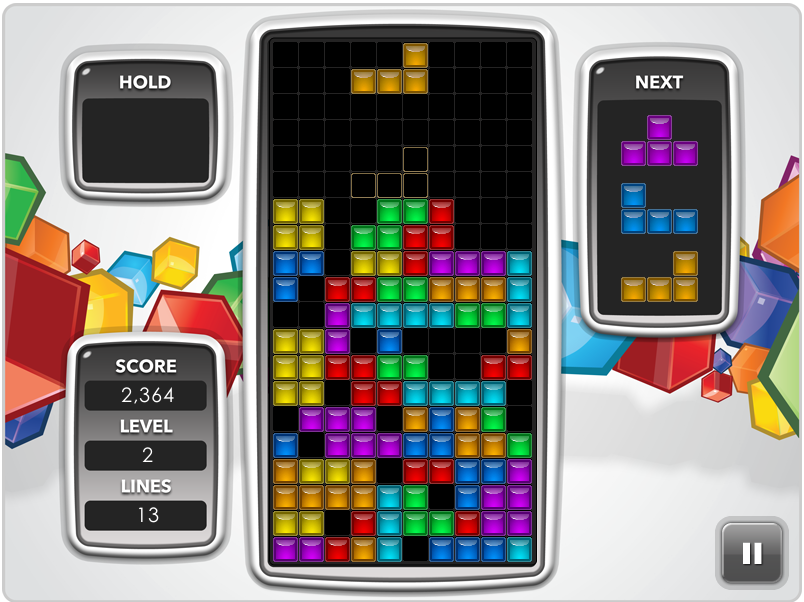

Unoccupied Cells : 86


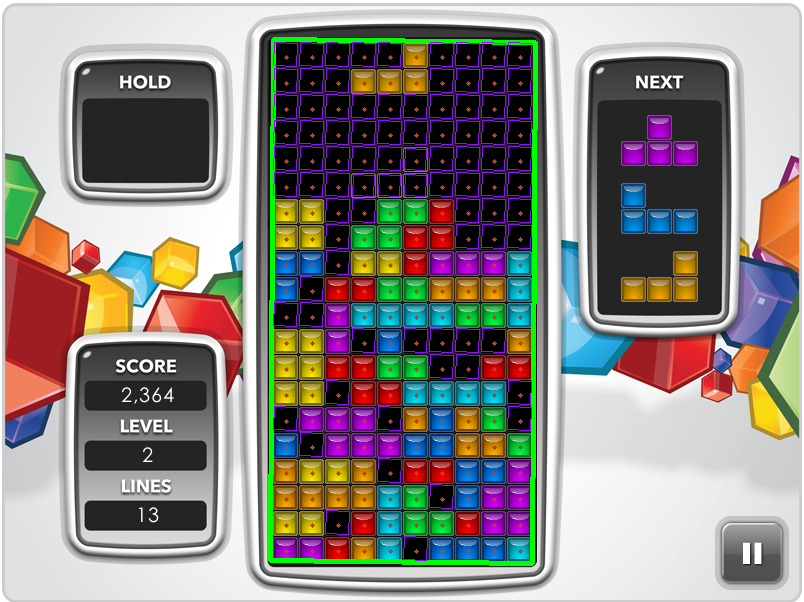

                0              1              2              3              4  \
0       [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]   
1       [0, 0, 0]      [0, 0, 0]      [0, 0, 0]  [0, 148, 208]  [0, 148, 208]   
2       [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]   
3       [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]   
4       [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]   
5       [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]      [0, 0, 0]   
6   [0, 200, 218]  [0, 200, 218]      [0, 0, 0]      [0, 0, 0]   [60, 218, 0]   
7   [0, 200, 218]  [0, 200, 218]      [0, 0, 0]   [60, 218, 0]   [60, 218, 0]   
8   [218, 117, 0]  [218, 117, 0]      [0, 0, 0]  [0, 200, 218]  [0, 200, 218]   
9   [218, 117, 0]      [0, 0, 0]    [0, 0, 218]    [0, 0, 218]   [60, 218, 0]   
10      [0, 0, 0]      [0, 0, 0]  [218, 0, 182]  [218, 195, 0]  [218, 195, 0]   
11  [0, 200, 218]  [0, 200, 

In [44]:
main(5) 
fun([0,0,0]) 